In [1]:
#import libraries
import pandas as pd
import numpy as np

#disable max columns
pd.set_option("display.max_columns", None)

#read the data
data = pd.read_csv("world-university-rankings/timesData.csv")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [3]:
data['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016])

Text(0.5, 1.0, 'Number of universities per country 2015')

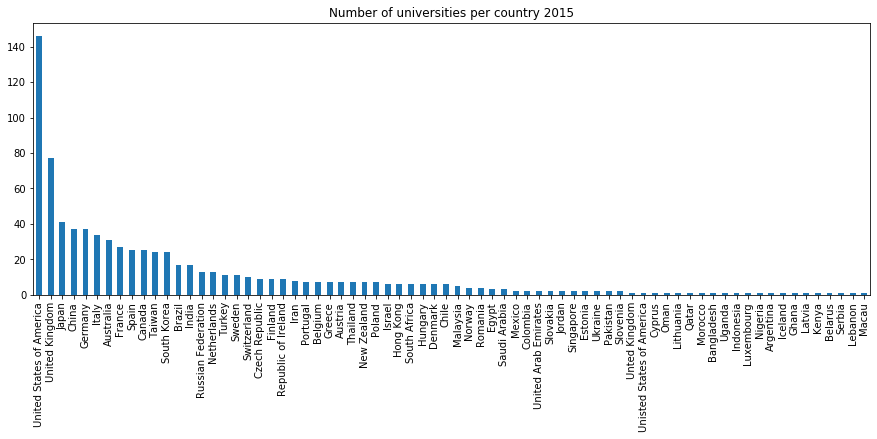

In [4]:
import matplotlib.pyplot as plt

#get all the data from 2016
copy = data.copy()
copy = copy[copy.year==2016]

#plot the number of universities per country
(copy['country'].value_counts(dropna = False)).plot.bar(figsize=(15,5))
plt.title("Number of universities per country 2015")

Text(0.5, 1.0, 'Number of universities per country 2015 Top 100')

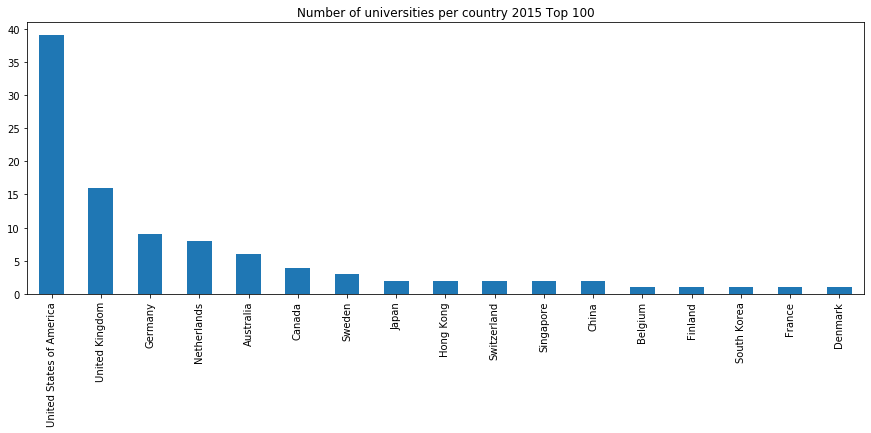

In [5]:
top = 100

#get the first X datas
copy = copy.head(top)

(copy['country'].value_counts(dropna = False)).plot.bar(figsize=(15,5))
plt.title("Number of universities per country 2015 Top " + str(top))

### Conclusion: USA has more universities in the top rank

In [6]:
#check how many nan values there is in each column
data.isna().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [7]:
#drop the female_male_ratio, university_name, country and total_score
#because they are string columns or have a lot of nan values
data = data.drop(columns = ['female_male_ratio', 'university_name', 'country', 'total_score'])

data.head()

,world_rank,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,year
0,1,99.7,72.4,98.7,98.8,34.5,"20,152",8.9,25%,2011
1,2,97.7,54.6,98.0,99.9,83.7,"2,243",6.9,27%,2011
2,3,97.8,82.3,91.4,99.9,87.5,"11,074",9.0,33%,2011
3,4,98.3,29.5,98.1,99.2,64.3,"15,596",7.8,22%,2011
4,5,90.9,70.3,95.4,99.9,-,"7,929",8.4,27%,2011


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   teaching                2603 non-null   float64
 2   international           2603 non-null   object 
 3   research                2603 non-null   float64
 4   citations               2603 non-null   float64
 5   income                  2603 non-null   object 
 6   num_students            2544 non-null   object 
 7   student_staff_ratio     2544 non-null   float64
 8   international_students  2536 non-null   object 
 9   year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 203.5+ KB


In [9]:
#replace the '-' by 0 in every object/string column
obj_columns = ['international', 'income', 'num_students', 'international_students']
data[obj_columns] = data[obj_columns].replace('-', 0)

#transform the world_rank to numeric and replace the nan values for -201 (will be used for binarization)
data['world_rank'] = pd.to_numeric(data['world_rank'], errors = 'coerce')
data['world_rank'].fillna(-201, inplace = True)

#format the numbers (take off the ',')
data['num_students'] = data['num_students'].str.replace(',', '')

#take off the % and convert to decimal
data['international_students'] = data['international_students'].str.replace('%', '')

#transform all the object/string columns to numeric
data[obj_columns] = data[obj_columns].apply(pd.to_numeric, errors = 'coerce', axis = 1)

data['international_students'] = data['international_students'] / 100

In [10]:
data.isna().sum()

world_rank                 0
teaching                   0
international              0
research                   0
citations                  0
income                     0
num_students              59
student_staff_ratio       59
international_students    67
year                       0
dtype: int64

In [11]:
#fill the nan values with the mean of the column

data['num_students'] = data['num_students'].fillna(data['num_students'].mean())
data['student_staff_ratio'] = data['student_staff_ratio'].fillna(data['student_staff_ratio'].mean())
data['international_students'] = data['international_students'].fillna(data['international_students'].mean())

#drop the rows with nan values
#data.dropna(inplace = True)

In [12]:
from sklearn.preprocessing import Binarizer

X = data.drop(columns = ['world_rank']).values
y = data['world_rank'].values

#apply the binarizer in the 'world_rank' column
#if it is in the threshold (101) will be 1, otherwise will be 0
binarizer = Binarizer(threshold = -101).fit(y.reshape(-1, 1))
y_transformed = binarizer.transform(y.reshape(-1, 1))
y_reshaped = np.ravel(y_transformed)
y_reshaped

array([1., 1., 1., ..., 0., 0., 0.])

In [13]:
data.head()

,world_rank,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,year
0,1.0,99.7,72.4,98.7,98.8,34.5,20152.0,8.9,0.25,2011
1,2.0,97.7,54.6,98.0,99.9,83.7,2243.0,6.9,0.27,2011
2,3.0,97.8,82.3,91.4,99.9,87.5,11074.0,9.0,0.33,2011
3,4.0,98.3,29.5,98.1,99.2,64.3,15596.0,7.8,0.22,2011
4,5.0,90.9,70.3,95.4,99.9,0.0,7929.0,8.4,0.27,2011


In [14]:
data.isna().sum()

world_rank                0
teaching                  0
international             0
research                  0
citations                 0
income                    0
num_students              0
student_staff_ratio       0
international_students    0
year                      0
dtype: int64

Text(0.5, 1.0, 'Each feature importance')

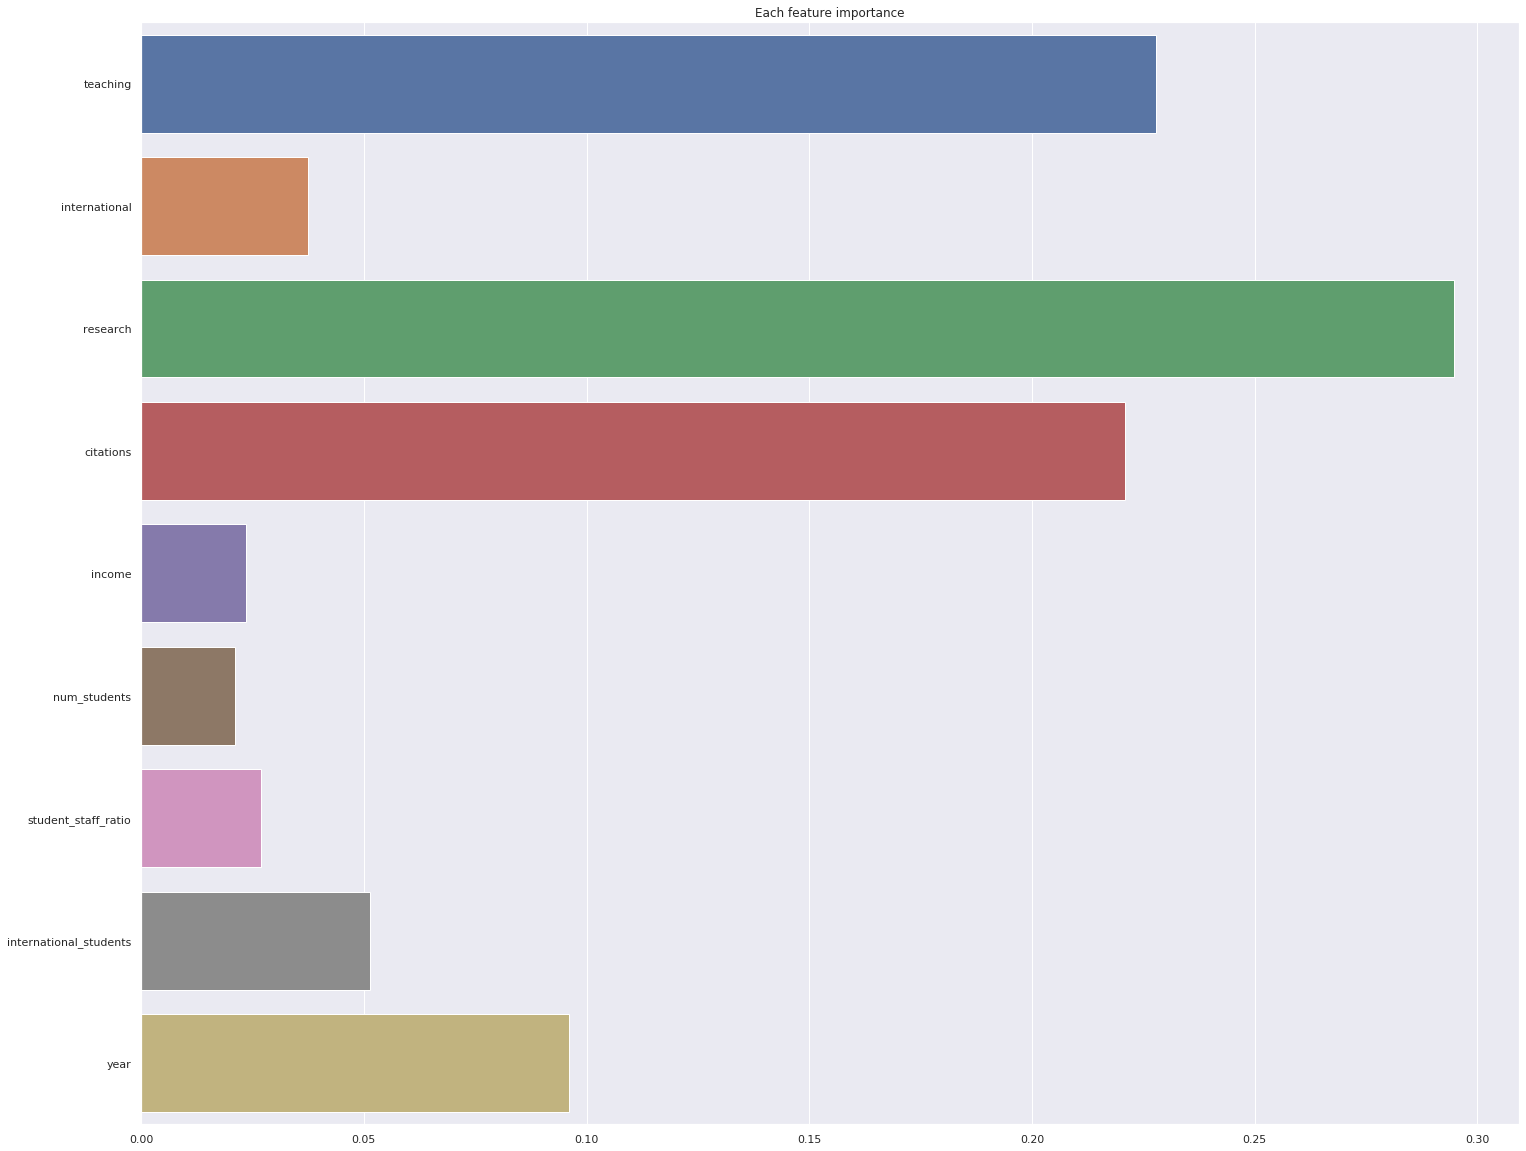

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns# Carregando dataset
sns.set(rc={'figure.figsize':(24.7,20.27)})

data_set = data.copy()

#drop the world_rank column
data = data.drop(columns = ['world_rank'])

X = data
y = np.ravel(y_transformed)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 19)

model  = RandomForestClassifier()
model.fit(X_train, y_train)

#check the most importants features using the Random Forest Classifier
importances = pd.Series(data=model.feature_importances_, index=X.columns)
sns.barplot(x=importances, y=importances.index, orient='h').set_title("Each feature importance")

In [16]:
#check the most importants features using the correlation between the features and the world_rank
data_set.corr()

,world_rank,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,year
world_rank,1.000000,0.514608,0.227985,0.538172,0.512746,0.054499,-0.002478,-0.166111,0.305338,-0.396398
teaching,0.514608,1.000000,0.124674,0.915688,0.506391,0.181452,0.041814,-0.284986,0.278663,-0.280282
international,0.227985,0.124674,1.000000,0.231120,0.317906,0.079169,-0.155894,0.048379,0.808593,-0.043248
research,0.538172,0.915688,0.231120,1.000000,0.526589,0.257806,0.059036,-0.201175,0.336260,-0.280275
citations,0.512746,0.506391,0.317906,0.526589,1.000000,-0.004730,-0.078035,-0.139802,0.314295,-0.180132
income,0.054499,0.181452,0.079169,0.257806,-0.004730,1.000000,-0.048257,0.012566,0.054725,0.066011
num_students,-0.002478,0.041814,-0.155894,0.059036,-0.078035,-0.048257,1.000000,0.340620,-0.181870,0.002712
student_staff_ratio,-0.166111,-0.284986,0.048379,-0.201175,-0.139802,0.012566,0.340620,1.000000,-0.086417,0.060699
international_students,0.305338,0.278663,0.808593,0.336260,0.314295,0.054725,-0.181870,-0.086417,1.000000,-0.158954
year,-0.396398,-0.280282,-0.043248,-0.280275,-0.180132,0.066011,0.002712,0.060699,-0.158954,1.000000


In [17]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=100)
model.fit(X,y)

#check the most importants features using Extra Trees Classifier
print(model.feature_importances_)
print()
print("Top features: teaching, research and citations")

[0.21757632 0.04299915 0.26811721 0.2108453  0.02965267 0.02619678
 0.03058409 0.04758032 0.12644817]

Top features: teaching, research and citations
